Mask stars with ``scubes`` package
==================================

``scubes`` package implements some ways to create a star mask for a selected stamp. The program uses [source-extractor](https://www.astromatic.net/software/sextractor/)
to create the mask and depends on a series of dedicated options.

Before the **SCUBE** created, one can choose two ways to create a stars mask:

1. ``scubes`` script has the option to include the source extractor (--mask_stars option);
2. ``sex_mask_stars`` script: Another script implemented by ``scubes`` package which creates a stars mask either using RA, DEC, TILE and SIZE options.

After the **SCUBE** generated, one can use two other options to create a stars mask:
1. ``sex_mask_stars_cube`` script, or;
2. reading a cube with ``scubes.utilities.read_scube`` class and using the method ``source_extractor()``.

The console scripts (``scubes``, ``sex_mask_stars`` and ``sex_mask_stars_cube``) allow the user to interact with the mask process. By using the option ``--no_interact`` the user can turn off the interaction with the mask process (inn order to create non-assisted runs). At the end the script generates a 2D mask FITS file, together with the S-PLUS data detection image and some **source-extractor** metadata files (2d segmentation fits, catalogs and logs). Also, a image of the detection is created. Here we show an example using ``sex_mask_stars`` script without interaction:

In [1]:
!sex_mask_stars --help

usage: sex_mask_stars [-h] [-l SIZE] [-x SEXTRACTOR] [-v] [-p CLASS_STAR] [-f]
                      [-N] [-S SATUR_LEVEL] [-B BACK_SIZE] [-T DETECT_THRESH]
                      [-U USERNAME] [-P PASSWORD] [-F] [-b BANDS]
                      [-g GALAXY_NAME]
                      SPLUS_TILE RA DEC

┌─┐   ┌─┐┬ ┬┌┐ ┌─┐┌─┐  | sex_mask_stars entry-point script:
└─┐───│  │ │├┴┐├┤ └─┐  | Uses S-PLUS detection image and SExtractor 
└─┘   └─┘└─┘└─┘└─┘└─┘  | to identify stars on the FOV. 
---------------------- + 

   Eduardo Alberto Duarte Lacerda <dhubax@gmail.com>, Fabio Herpich <fabiorafaelh@gmail.com>

positional arguments:
  SPLUS_TILE                  Name of the S-PLUS tile
  RA                          Galaxy's right ascension
  DEC                         Galaxy's declination

options:
  -h, --help                  show this help message and exit
  -l SIZE, --size SIZE        Size of the cube in pixels. Default value is 500
  -x SEXTRACTOR, --sextractor SEXTRACTOR
                 

In [2]:
!sex_mask_stars -N -F -x source_extractor -U YOURUSER -P YOURPASS -l 500 -g NGC3312 -- HYDRA-0045 10h37m02.5s -27d33\'56\"

[2024-05-26T16:23:23.814679] - sex_mask_stars: Detection file exists.
[2024-05-26T16:23:25.915109] - sex_mask_stars: Calculating mask...
[2024-05-26T16:23:25.915127] - sex_mask_stars: Running SExtractor to get photometry...
Output catalog ./NGC3312_detection.cat.txt already exists, I will overwrite it
Ouch, SExtractor complains :
b''
Output catalog ./NGC3312_detection.cat.txt already exists, I will overwrite it
Ouch, SExtractor complains :
b''
[2024-05-26T16:23:26.604564] - sex_mask_stars: Saving fig to ./NGC3312_HYDRA-0045_500x500_maskMosaic.png
[2024-05-26T16:23:27.159480] - sex_mask_stars: Saving mask to NGC3312_sexmask.fits


In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [4]:
sexmask = fits.open('NGC3312_sexmask.fits')
sexmask.info()

Filename: NGC3312_sexmask.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  MASK          1 ImageHDU        28   (500, 500)   int64   


In [5]:
dimage = fits.open('NGC3312_detection.fits')
dimage.info()

Filename: NGC3312_detection.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  IMAGE         1 ImageHDU        51   (500, 500)   float32   


The *MASK* hdu header carries the WCS information:

In [6]:
from astropy.wcs import WCS

sexmask_wcs = WCS(sexmask['MASK'].header)
dimage_wcs = WCS(dimage['IMAGE'].header)

Plot mask
---------

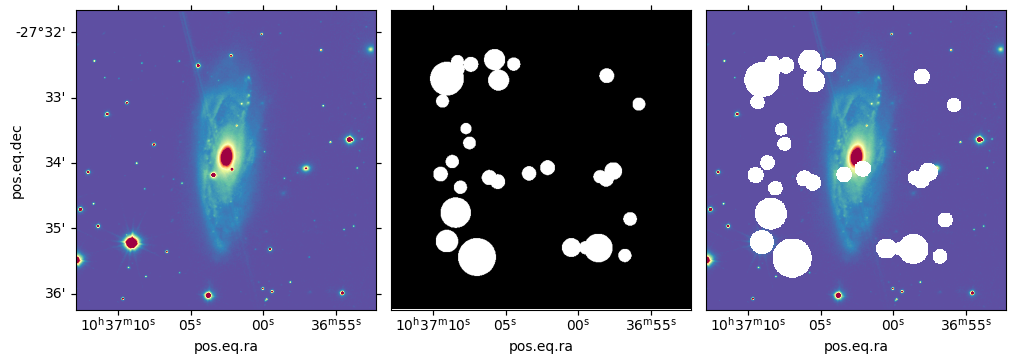

In [7]:
mask__yx = sexmask['MASK'].data
dimage__yx = dimage['IMAGE'].data
masked_dimage__yx = np.ma.masked_array(dimage__yx, mask=mask__yx, copy=True)

f = plt.figure()
f.set_size_inches(12, 5)
ax1 = f.add_subplot(1,3,1, projection=dimage_wcs)
ax2 = f.add_subplot(1,3,2, projection=sexmask_wcs)
ax3 = f.add_subplot(1,3,3, projection=dimage_wcs)
ax1.imshow(dimage__yx, origin='lower', cmap='Spectral_r', vmin=0, vmax=5)
ax2.imshow(mask__yx, origin='lower', cmap='Greys_r')
ax3.imshow(masked_dimage__yx, origin='lower', cmap='Spectral_r', vmin=0, vmax=5)
ax2.coords[1].set_ticks_visible(False)
ax3.coords[1].set_ticks_visible(False)
ax2.coords[1].set_ticklabel_visible(False)
ax3.coords[1].set_ticklabel_visible(False)
ax1.coords[1].set_axislabel('pos.eq.dec', minpad=-0.1)
f.subplots_adjust(wspace=0.05)

Examples with a **SCUBE**
-------------------------

Here we show an example to create a stars mask using a **SCUBE** FITS. We can choose two ways, one is using sex_mask_stars_cube console script, which allows the user to interact with the mask creation and the ``scubes.utilities.readscube.read_cube()`` class. 

First an example using ``sex_mask_stars_cube`` script:

In [8]:
!sex_mask_stars_cube -U YOURUSER -P YOURPASS -N -F -x source_extractor NGC3312/NGC3312_cube.fits

[2024-05-26T16:23:30.159942] - sex_mask_stars_cube: Detection file exists.
[2024-05-26T16:23:32.256039] - sex_mask_stars_cube: Calculating mask...
[2024-05-26T16:23:32.256055] - sex_mask_stars_cube: Running SExtractor to get photometry...
Output catalog ./NGC3312_detection.cat.txt already exists, I will overwrite it
Ouch, SExtractor complains :
b''
Output catalog ./NGC3312_detection.cat.txt already exists, I will overwrite it
Ouch, SExtractor complains :
b''
[2024-05-26T16:23:32.943334] - sex_mask_stars_cube: Saving fig to ./NGC3312_HYDRA-0045_500x500_maskMosaic.png
[2024-05-26T16:23:33.523069] - sex_mask_stars_cube: Saving mask to NGC3312_sexmask.fits


The same files created before, are now created again with this script. Now, an example using ``scubes.utilities.readscube.read_cube()`` class and the method ``source_extractor``

In [9]:
from scubes.utilities.readscube import read_scube

scube = read_scube('NGC3312/NGC3312_cube.fits')
scube.source_extractor(
    sextractor='source-extractor', 
    username='YOURUSER', password='YOURPASS',
)

[2024-05-26T16:23:34.976732] - : Detection file exists.


Output catalog ./NGC3312_detection.cat.txt already exists, I will overwrite it
Ouch, SExtractor complains :
b''


[2024-05-26T16:23:37.055966] - : Calculating mask...
[2024-05-26T16:23:37.056009] - : Running SExtractor to get photometry...


[2024-05-26T16:23:37.451302] - : Saving fig to ./NGC3312_HYDRA-0045_500x500_maskMosaic.png
[2024-05-26T16:23:37.972078] - : Saving mask to NGC3312_sexmask.fits


Using this option, the user can found the **MASK FITS** loaded at the ``scube`` object:

In [10]:
scube.mask_stars_hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  MASK          1 ImageHDU        28   (500, 500)   int64   


In [11]:
scube.detection_image_hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  IMAGE         1 ImageHDU        51   (500, 500)   float32   


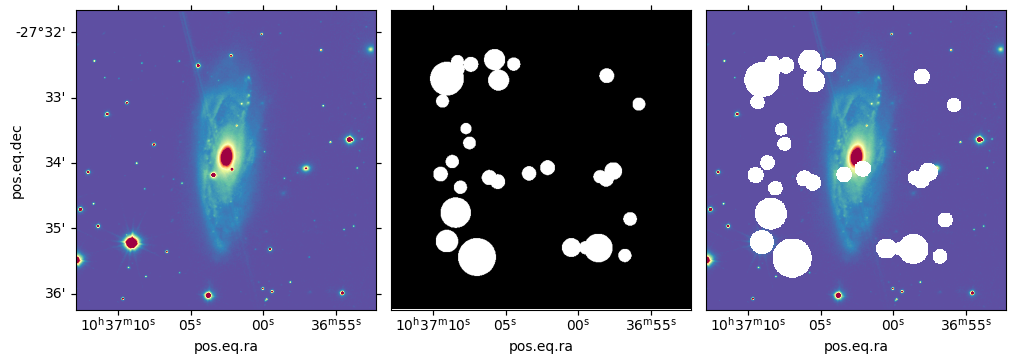

In [12]:
sexmask_wcs = WCS(scube.mask_stars_hdul['MASK'].header)
dimage_wcs = WCS(scube.detection_image_hdul['IMAGE'].header)
mask__yx = scube.mask_stars_hdul['MASK'].data
dimage__yx = scube.detection_image_hdul['IMAGE'].data
masked_dimage__yx = np.ma.masked_array(dimage__yx, mask=mask__yx, copy=True)

f = plt.figure()
f.set_size_inches(12, 5)
ax1 = f.add_subplot(1,3,1, projection=dimage_wcs)
ax2 = f.add_subplot(1,3,2, projection=sexmask_wcs)
ax3 = f.add_subplot(1,3,3, projection=dimage_wcs)
ax1.imshow(dimage__yx, origin='lower', cmap='Spectral_r', vmin=0, vmax=5)
ax2.imshow(mask__yx, origin='lower', cmap='Greys_r')
ax3.imshow(masked_dimage__yx, origin='lower', cmap='Spectral_r', vmin=0, vmax=5)
ax2.coords[1].set_ticks_visible(False)
ax3.coords[1].set_ticks_visible(False)
ax2.coords[1].set_ticklabel_visible(False)
ax3.coords[1].set_ticklabel_visible(False)
ax1.coords[1].set_axislabel('pos.eq.dec', minpad=-0.1)
f.subplots_adjust(wspace=0.05)